In [1]:
import matplotlib.pyplot as plt
import numpy as np

from neurodsp.sim import sim_bursty_oscillation
from neurodsp.sim import sim_powerlaw
from neurodsp.plts import plot_bursts

from statsmodels.tsa.stattools import acf

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Simulate

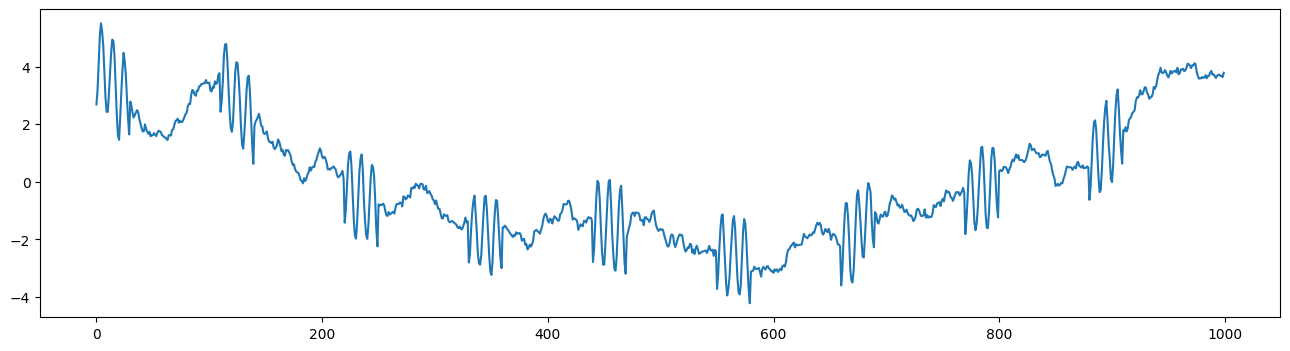

In [2]:
np.random.seed(0)

n_seconds = 10
fs = 100

burst = sim_bursty_oscillation(
    n_seconds, fs, freq=10, burst_def='durations',
    burst_params={'n_cycles_burst': 3, 'n_cycles_off': 8}, phase='min'
)

sig = burst + sim_powerlaw(n_seconds, fs) * 2

plt.figure(figsize=(16, 4))
plt.plot(sig)

## Window & Autocorrelation

In [3]:
# Windowed ACF
cycle_len = int(3 * (fs / 10))

n_windows = len(sig)-cycle_len

nlags = 25
X = np.zeros((n_windows, nlags))
sig_windowed = np.zeros((n_windows, cycle_len))
    
for i in range(0, n_windows):
    sig_windowed[i] = sig[i:i+cycle_len]
    X[i] = acf(sig_windowed[i], nlags=nlags-1)
    
X_scale = StandardScaler().fit_transform(X)

## Cluster

In [4]:
km = KMeans(n_clusters=2, n_init="auto", random_state=1)
clusters = km.fit_predict(X_scale)

## Plot Results

(-1.2, 1.2)

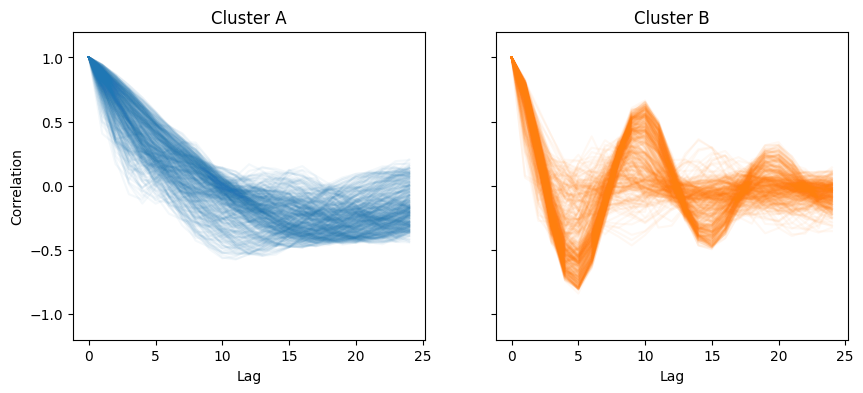

In [5]:
is_burst = np.zeros_like(sig, dtype=bool)
half_len = cycle_len//2

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

for i, label in enumerate(clusters):
    if label == 0.0:
        axes[0].plot(X[i], color='C0', alpha=.05)
        is_burst[half_len:-half_len][i] = False
    elif label == 1.0:
        axes[1].plot(X[i], color='C1', alpha=.05)
        is_burst[half_len:-half_len][i] = True
        
axes[0].set_title('Cluster A')
axes[1].set_title('Cluster B')
axes[0].set_ylabel('Correlation')
axes[0].set_xlabel('Lag')
axes[1].set_xlabel('Lag')
axes[0].set_ylim(-1.2, 1.2)
axes[1].set_ylim(-1.2, 1.2)

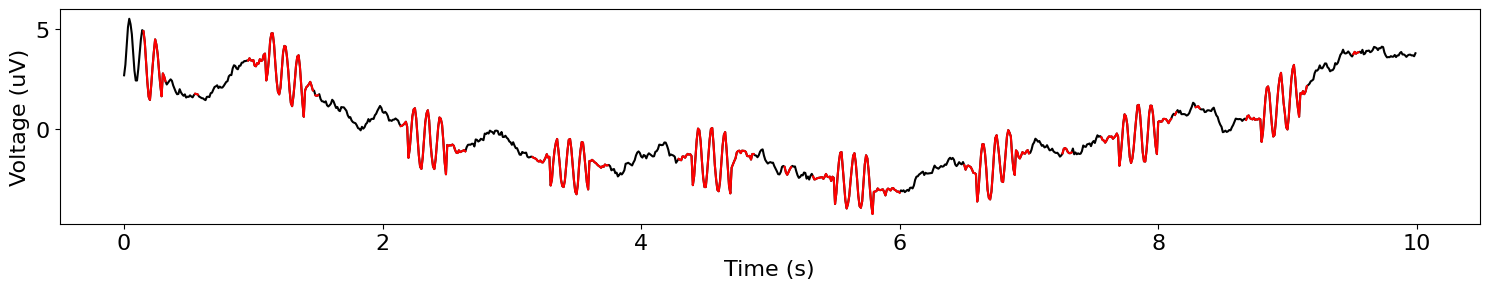

In [6]:
times = np.arange(0, len(sig)/fs, 1/fs)
plot_bursts(times, sig, is_burst);